In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-07-10 12:34:47.063665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 12:34:47.117110: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 12:34:47.117912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 12:34:48.170743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

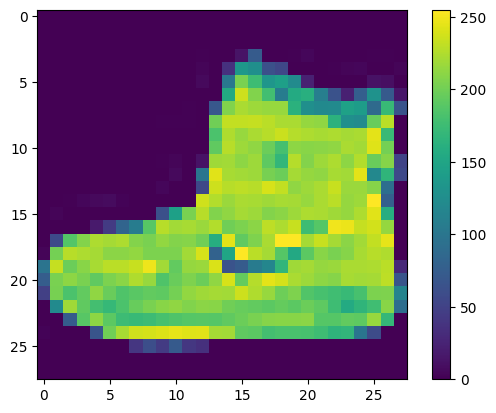

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images, test_images = train_images/255.0, test_images/255.0

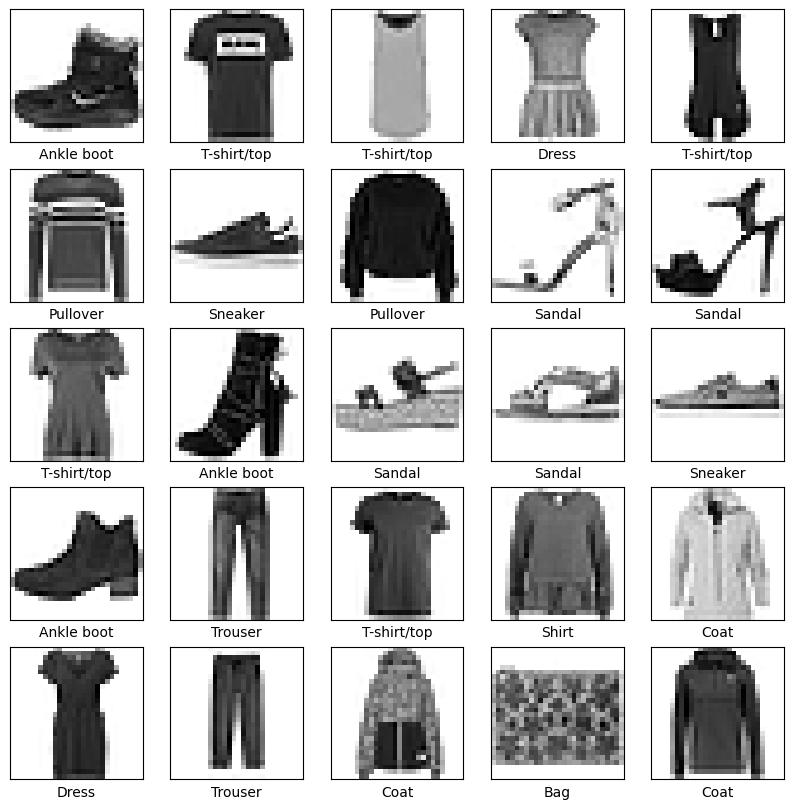

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2024-07-10 13:13:32.257913: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5023 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3409 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2973 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2823 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2707 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2517 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2412 - accurac

In [19]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3563 - accuracy: 0.8770 - 813ms/epoch - 3ms/step


[0.35630008578300476, 0.8769999742507935]

In [20]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [21]:
predictions = prob_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [22]:
predictions[0]

array([7.9566320e-08, 2.9662668e-11, 4.4613997e-09, 4.5550430e-10,
       9.0939402e-11, 5.3995460e-05, 7.3949124e-08, 8.1375819e-03,
       1.2417485e-09, 9.9180824e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(prediction, true_label, image):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    color = 'red'
    if predicted_label == true_label:
        color = 'green'

    plt.xlabel(
        '{} {:2.0f}% ({})'.format(class_names[predicted_label], np.max(prediction)*100, class_names[true_label]),
        color=color
    )

In [44]:
def plot_value_array(prediction, true_label):
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    this_plot = plt.bar(range(10), prediction, color='#777777')
    plt.ylim([0,1])

    predicted_label = np.argmax(prediction)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('green')

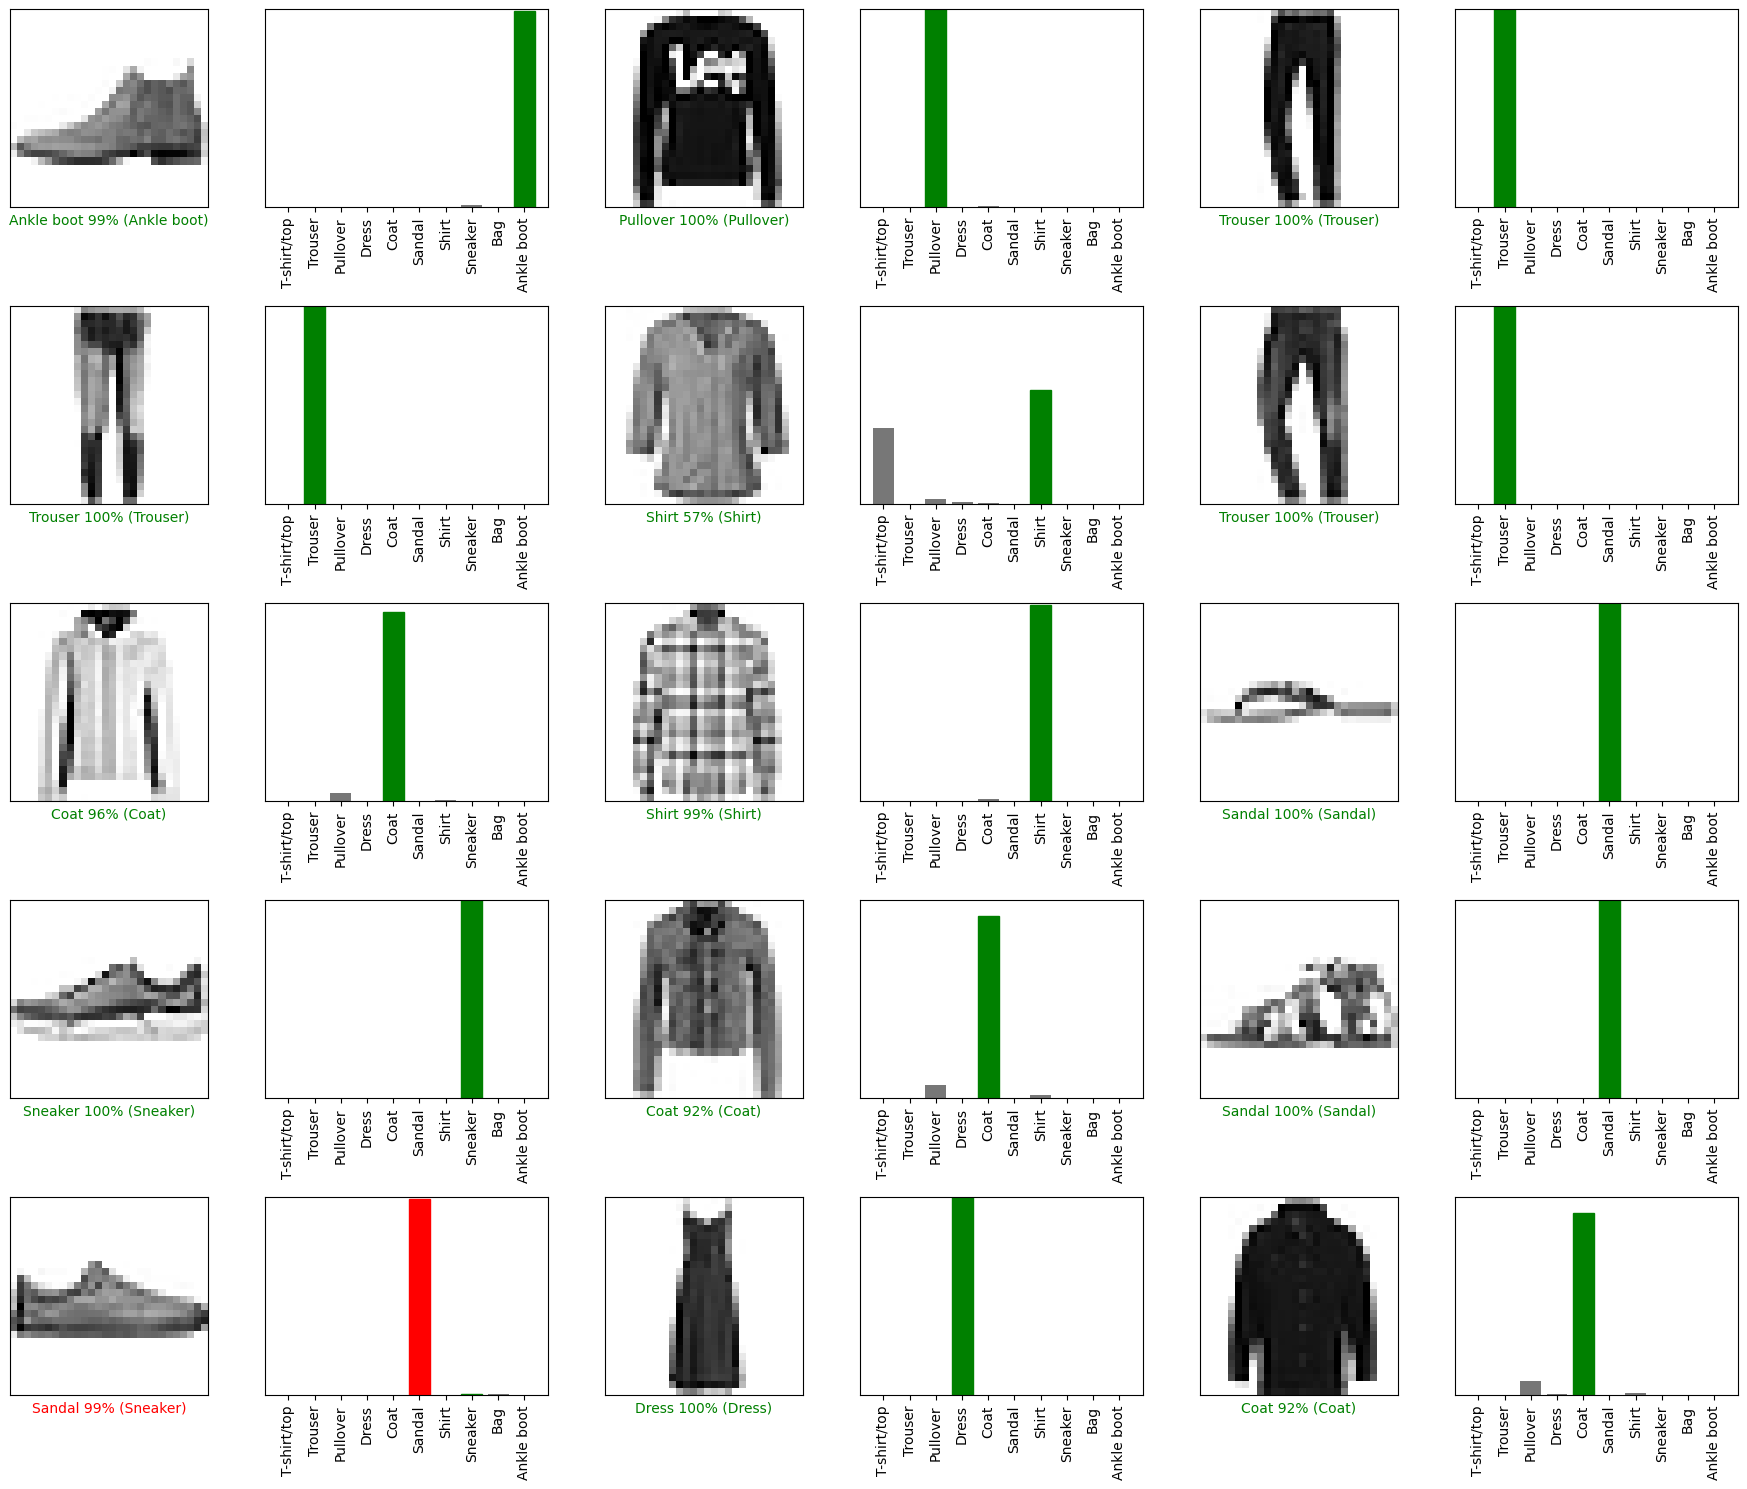

In [45]:
# increase the value of rows for more images
rows = 5
cols = 3
num_of_images = rows*cols
plt.figure(figsize=(3*2*cols, 3*rows))
for i in range(num_of_images):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()